# Project Title: Financial Inclusion in Africa
### Project Description
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

[`link to dataset`](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

### Variable Definitions

| Column                   | Description                                                                      |
|------------------------- |--------------------------------------------------------------------------------- |
| `country`                | Country interviewee is in                                                        |
| `city`                   | A code for the city the student lives in.                                        |
| `year`                   | Year survey was done in.                                                         |
| `location_type`          | Type of location: Rural, Urban                                                   |
| `cellphone_access`       | If interviewee has access to a cellphone: Yes, No                                |
| `household_size`         | Number of people living in one house                                             |
| `age_of_respondent`      | The age of the interviewee                                                       |
| `gender_of_respondent`   | Gender of interviewee: Male, Female                                              |
| `relationship_with_head` | The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know                                                                                |
| `marital_status`         | The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know                                                                                                    |
| `education_level`        | Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA                                                             |
| `job_type`               | Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answerA unique ID for each student                                                                                                  |


In [1]:
## librarie(s) for loading and preprocessing 
import numpy as np
import pandas as pd 

## libarie(s) for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

## library for building a validation framwork
from sklearn.model_selection import train_test_split, cross_val_score

##library for data scaling 
from sklearn.preprocessing import StandardScaler

## library for feature engineering 
from sklearn.feature_extraction import DictVectorizer

## libraries for computing classification accuracy score
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                            confusion_matrix, roc_auc_score)

## library for ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from xgboost import XGBClassifier 


import warnings 
warnings.filterwarnings("ignore")

# Load datasets and Overview

In [2]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col, 'unique')
    print(df[col].unique(), '\n')

country unique
['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

uniqueid unique
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759'] 

bank_account unique
['Yes' 'No'] 

location_type unique
['Rural' 'Urban'] 

cellphone_access unique
['Yes' 'No'] 

gender_of_respondent unique
['Female' 'Male'] 

relationship_with_head unique
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives'] 

marital_status unique
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know'] 

education_level unique
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA'] 

job_type unique
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income'] 



# Data Processing
- The data is all cleaned up, no null values
- Drop uniqueid column as it is irrelevant for model training
- Convert year column to object dtype
- Encode target column to binary

In [9]:
# drop uniqueid column
df.drop(['uniqueid'], axis=1, inplace=True)
test_uniqueid = df_test.uniqueid.values # store test uniqueid for submission
df_test.drop(['uniqueid'], axis=1, inplace=True)

# convert year to object dtype
df_test.year = df_test.year.astype('object')
df.year = df.year.astype('object')

# encode target column to binary
df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})

In [10]:
# confirm data processing
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Data Exploration

In [11]:
# percentage of respondents with bank account
df['bank_account'].value_counts(normalize=True).round(2)*100

bank_account
0    86.0
1    14.0
Name: proportion, dtype: float64

14% percent of people have bank accounts against 86% who don't. This introduces bais into our model training

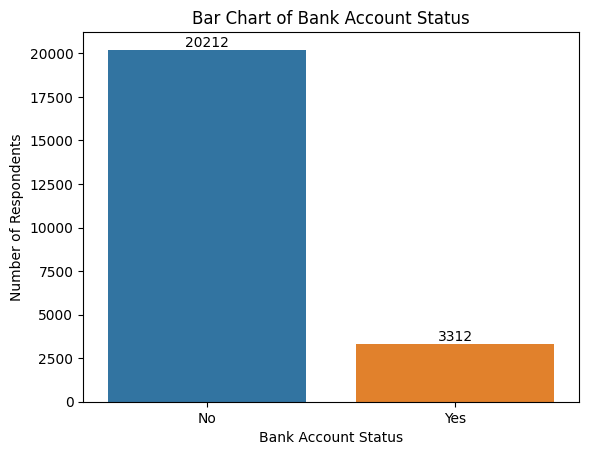

In [12]:
# visualization of bank account status
fig , ax = plt.subplots()
ax = sns.countplot(data=df, x='bank_account', hue='bank_account', legend=False)
ax.set_xlabel('Bank Account Status')
ax.set_ylabel('Number of Respondents')
ax.set_title('Bar Chart of Bank Account Status')
ax.set_xticklabels(['No', 'Yes'])
for container in ax.containers: # for loop to display the the count 
    ax.bar_label(container)
plt.show()

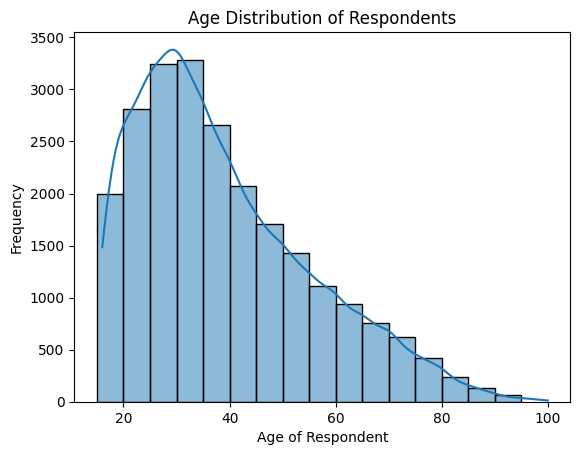

In [13]:
# age distribution
fig , ax = plt.subplots()
ax = sns.histplot(data=df, x='age_of_respondent', kde=True, bins=np.arange(15,100,5), )
ax.set_xlabel('Age of Respondent')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution of Respondents')
plt.show()

Age distribution of respondents is right-skewed with mode age occuring between 30-35 years

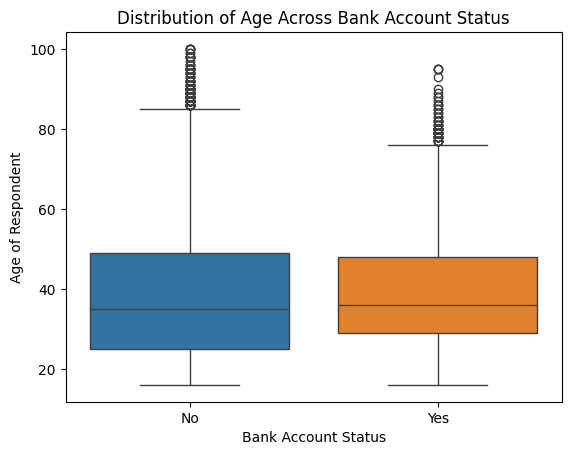

In [14]:
# age distribution with boxplot
fig , ax = plt.subplots()
ax = sns.boxplot(data=df, x='bank_account', y='age_of_respondent', hue='bank_account', legend=False)
ax.set_xlabel('Bank Account Status')
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Age of Respondent')
ax.set_title('Distribution of Age Across Bank Account Status')
plt.show()

The average age for both people with and without bank accounts are fairly the same aroung 35 years. Both observations have outliers

Text(0.5, 1.0, 'Correlation Matrix')

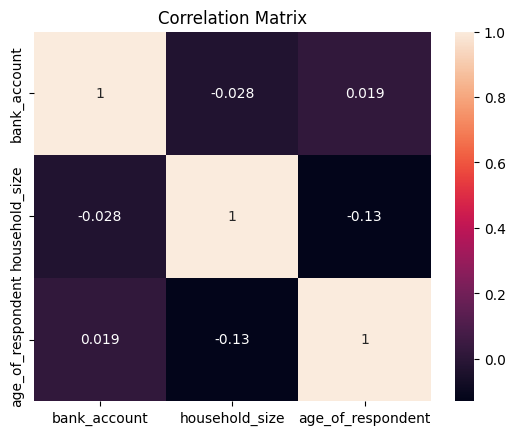

In [15]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)
plt.title('Correlation Matrix')

There are no correlation between the numerical variables

In [16]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True).round(3)*100, '\n')

country
Rwanda      37.1
Tanzania    28.1
Kenya       25.8
Uganda       8.9
Name: proportion, dtype: float64 

year
2016    37.1
2018    34.7
2017    28.1
Name: proportion, dtype: float64 

location_type
Rural    61.0
Urban    39.0
Name: proportion, dtype: float64 

cellphone_access
Yes    74.2
No     25.8
Name: proportion, dtype: float64 

gender_of_respondent
Female    59.0
Male      41.0
Name: proportion, dtype: float64 

relationship_with_head
Head of Household      54.5
Spouse                 27.7
Child                   9.5
Parent                  4.6
Other relative          2.8
Other non-relatives     0.8
Name: proportion, dtype: float64 

marital_status
Married/Living together    45.7
Single/Never Married       33.9
Widowed                    11.5
Divorced/Seperated          8.8
Dont know                   0.0
Name: proportion, dtype: float64 

education_level
Primary education                  54.4
No formal education                19.2
Secondary education                18.0

- 37.1% of respondents are from Rwanda, followed by Tanzania with 28.1%, Kenya with 25.8% and Uganda with 8.9%
- 61% of respondents are from the rural area while 39% are from the urban
- 25.8% did not have phones
- There are more females(59%) than males(41%)
- 54.5% of respondents are the heads of household
- 45.7% of respondents are married while 33.9% are single with 11.5% widows
- Most respondents completed Primary education(54.4%) with 4.9% completing tetiary education
- 27.4% are self-employed followed by Informally employed and Farming and Fishing having a close perentages of 23.8% and 23.1% respectively

In [17]:
from tabulate import tabulate

for column in df.select_dtypes(include='object').columns:
    temp = pd.crosstab(df[column], df['bank_account'], normalize='index').round(3)*100
    print(f"\n{column} bank account status".upper())
    print(tabulate(temp, headers='keys', tablefmt='presto'))


COUNTRY BANK ACCOUNT STATUS
 country   |    0 |    1
-----------+------+------
 Kenya     | 74.9 | 25.1
 Rwanda    | 88.5 | 11.5
 Tanzania  | 90.8 |  9.2
 Uganda    | 91.4 |  8.6

YEAR BANK ACCOUNT STATUS
   year |    0 |    1
--------+------+------
   2016 | 88.5 | 11.5
   2017 | 90.8 |  9.2
   2018 | 79.2 | 20.8

LOCATION_TYPE BANK ACCOUNT STATUS
 location_type   |    0 |    1
-----------------+------+------
 Rural           | 88.3 | 11.7
 Urban           | 82.1 | 17.9

CELLPHONE_ACCESS BANK ACCOUNT STATUS
 cellphone_access   |    0 |    1
--------------------+------+------
 No                 | 98.3 |  1.7
 Yes                | 81.6 | 18.4

GENDER_OF_RESPONDENT BANK ACCOUNT STATUS
 gender_of_respondent   |    0 |    1
------------------------+------+------
 Female                 | 89.3 | 10.7
 Male                   | 81   | 19

RELATIONSHIP_WITH_HEAD BANK ACCOUNT STATUS
 relationship_with_head   |    0 |    1
--------------------------+------+------
 Child                    | 91

- Most respondents from all the four countries have no bank accounts but Uganda has the highest percentage of 91.4%
- Most repondents, above 82%, have no bank account regardless of their location type (Rural/ Urban)
- 98% of respondents without cellphone access have no bank account
- The percentage of men who have bank accounts is greater than that of women
- Child and parent dependencies recorded the highest percentage with no bank account. Generally, dependency suggests financial instability
- Widows have the highest percentage of respondents who have no bank accounts followed by divorced/ seperated, single and then married
- Generally, having a bank account decreases with decreasing education level
- Respondents with No Income recorded the highest percentage of no bank account while Formally Employed Government has the highest percentage of respondents with bank accounts

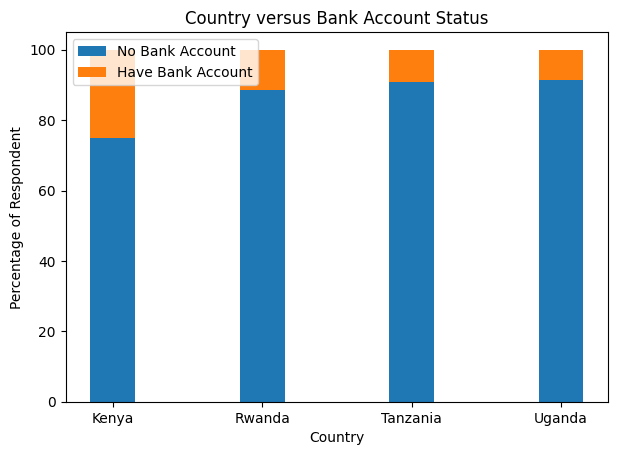

In [18]:
temp = pd.crosstab(df['country'], df['bank_account'], normalize='index').round(3)*100
temp.reset_index()

fig, ax = plt.subplots()
fig.set_figwidth(7)
ax.bar(temp.index, temp[0], label='No Bank Account', width=0.3)
ax.bar(temp.index, temp[1], bottom=temp[0], label='Have Bank Account', width=0.3)
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of Respondent')
ax.set_title('Country versus Bank Account Status')
ax.legend()
plt.show()

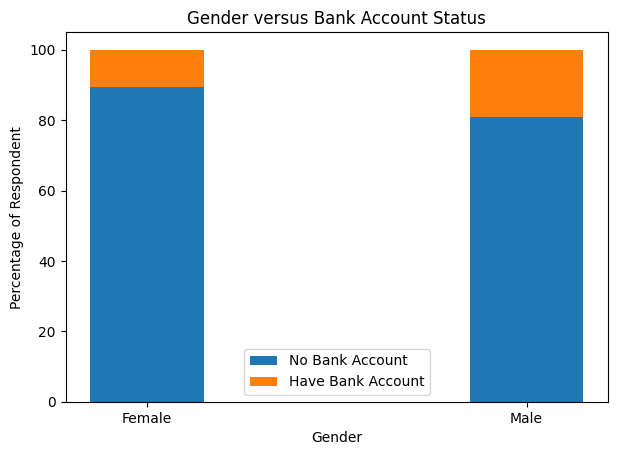

In [19]:
temp = pd.crosstab(df['gender_of_respondent'], df['bank_account'], normalize='index').round(3)*100
temp.reset_index()

fig, ax = plt.subplots()
fig.set_figwidth(7)
ax.bar(temp.index, temp[0], label='No Bank Account', width=0.3)
ax.bar(temp.index, temp[1], bottom=temp[0], label='Have Bank Account', width=0.3)
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Respondent')
ax.set_title('Gender versus Bank Account Status')
ax.legend()
plt.show()

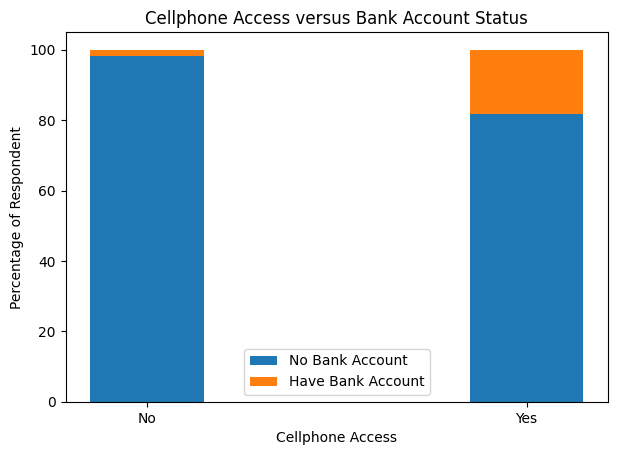

In [20]:
temp = pd.crosstab(df['cellphone_access'], df['bank_account'], normalize='index').round(3)*100
temp.reset_index()

fig, ax = plt.subplots()
fig.set_figwidth(7)
ax.bar(temp.index, temp[0], label='No Bank Account', width=0.3)
ax.bar(temp.index, temp[1], bottom=temp[0], label='Have Bank Account', width=0.3)
ax.set_xlabel('Cellphone Access')
ax.set_ylabel('Percentage of Respondent')
ax.set_title('Cellphone Access versus Bank Account Status')
ax.legend()
plt.show()

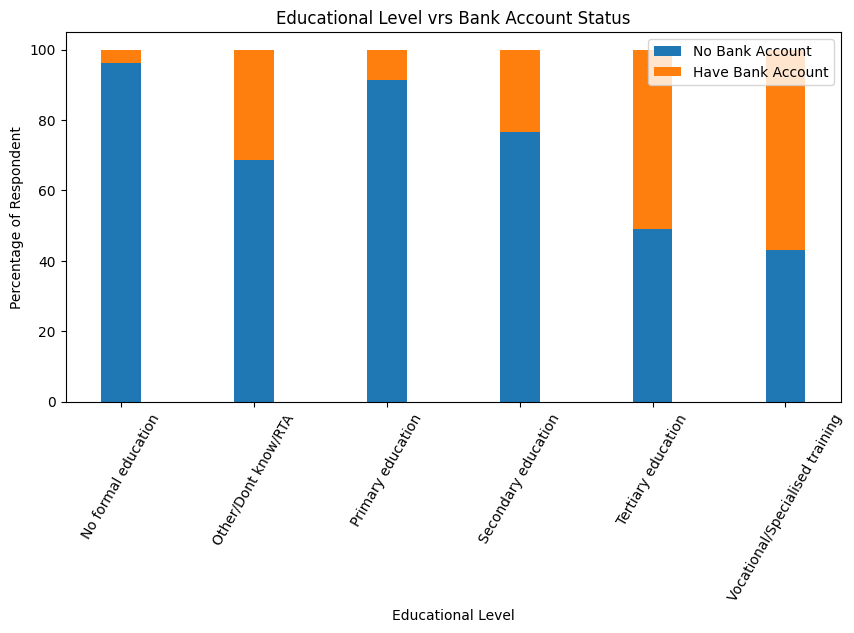

In [21]:
df['education_level'].astype('category').cat.reorder_categories(new_categories=['Other/Dont know/RTA', 'No formal education', 'Primary education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training'], ordered=True)
temp = pd.crosstab(df['education_level'], df['bank_account'], normalize='index').round(3)*100
temp.reset_index()

fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.bar(temp.index, temp[0], label='No Bank Account', width=0.3)
ax.bar(temp.index, temp[1], bottom=temp[0], label='Have Bank Account', width=0.3)
ax.set_xlabel('Educational Level')
ax.set_ylabel('Percentage of Respondent')
ax.set_title('Educational Level vrs Bank Account Status')
ax.set_xticklabels(['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training'] ,rotation=60)
ax.legend()
plt.show()

# Machine Learning

In [22]:
# declare feature engineering function
def feature_engineering(dataframe, split_ratio: float, target_column: str):
    """This function takes a dataframe and perfrom these operations:
    1. Splits Dataframe by the split ratio
    2. Retrives the target column into y_train and y_valid
    3. Perform a one-hot encoding on the feature varibles using dict vectorizer
    4. Returns four seperate arrays of (x_train, x_valid, y_train, y_valid)"""
    
    # split dataset into train and test
    df_train, df_valid = train_test_split(dataframe, test_size = split_ratio, random_state = 10)
    print(f'Training Dataset {df_train.shape}')
    print(f'Validation Dataset {df_valid.shape}')

    # select target column
    y_train = df_train[target_column].values
    y_valid = df_valid[target_column].values

    # delete target columns from the rest of the dataframe
    del df_train[target_column]
    del df_valid[target_column]

    # convert dataframe(inputs) into dict
    train_dict = df_train.to_dict(orient = 'records')
    valid_dict = df_valid.to_dict(orient = 'records')

    # train the vectorizer with train_dict (one-hot encoding)
    global dv 
    dv = DictVectorizer()
    dv.fit(train_dict)

    # transform data into arrays
    x_train = dv.transform(train_dict)
    x_valid = dv.transform(valid_dict)

    print('Vectorized Train Data Shape:', x_train.shape)
    print('Vectorized Validation Data Shape:', x_valid.shape)

    return x_train, x_valid, y_train, y_valid

In [23]:
# call feature engineering function
x_train, x_valid, y_train, y_valid = feature_engineering(df, split_ratio=0.3, target_column='bank_account')

Training Dataset (16466, 12)
Validation Dataset (7058, 12)
Vectorized Train Data Shape: (16466, 40)
Vectorized Validation Data Shape: (7058, 40)


In [24]:
# initiate models
LR_model = LogisticRegression(solver='liblinear', random_state=10)
RFC_model = RandomForestClassifier(n_estimators=150, random_state=10, n_jobs=-1, criterion='entropy')
DTC_model = DecisionTreeClassifier(criterion='entropy', random_state=10)
ABC_model = AdaBoostClassifier(n_estimators=150, random_state=10, learning_rate=0.9)
GBC_model = GradientBoostingClassifier(n_estimators=150, random_state=10, learning_rate=0.9)
XGB_model = XGBClassifier()

# declare a function to train all models
def classification_algorithms(x_train: list, x_valid: list, y_train: list, y_valid: list):
    """This function takes arrays of x_train, x_valid, y_train, y_valid and perfrom these operations:
    1. Train each algorithm 
    2. Compute model evaluation metrics
    3. Return summary table of model evaluation metrics and a confusion matrix"""

    # create list of models
    models = [LR_model, RFC_model, DTC_model, ABC_model, GBC_model, XGB_model]
    summary = {} # dictonary to create dataframe
    summary['Model'] = ['Accuracy Score', 'f1 Score','Recall Score', 'Precision Score']
    plt.figure(figsize=(20, 10)) # set visualization pane size

    # a for loop to interate through the models
    for model in models:
        model.fit(x_train, y_train) #train model
        prediction = model.predict(x_valid) # generate predictions
        # model evaluation
        acc_score = accuracy_score(y_valid, prediction)
        f1 = f1_score(y_valid, prediction)
        recall = recall_score(y_valid, prediction)
        precision = precision_score(y_valid, prediction) 
        # append results to dictionary
        summary[str(model).split('(')[0]] = [round(acc_score*100, 2), round(f1, 2), round(recall, 2), round(precision, 2)]

        # confusion matrix plot
        cm = confusion_matrix(y_valid, prediction)
        plt.subplot(2, 3, models.index(model) + 1)
        sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Negative', 'Predicted Positive'], 
                    yticklabels=['Actual Negative', 'Actual Positive'])
        plt.title(f'{str(model).split('(')[0]}')

    # dictionary to dataframe
    table = pd.DataFrame(summary)
    display(table.T)

    # show confusion matrix plots
    plt.show()


,0,1,2,3
Model,Accuracy Score,f1 Score,Recall Score,Precision Score
LogisticRegression,88.54,0.44,0.32,0.67
RandomForestClassifier,86.03,0.42,0.37,0.49
DecisionTreeClassifier,82.57,0.36,0.36,0.36
AdaBoostClassifier,88.2,0.4,0.29,0.66
GradientBoostingClassifier,88.14,0.46,0.37,0.61
XGBClassifier,88.1,0.46,0.37,0.61


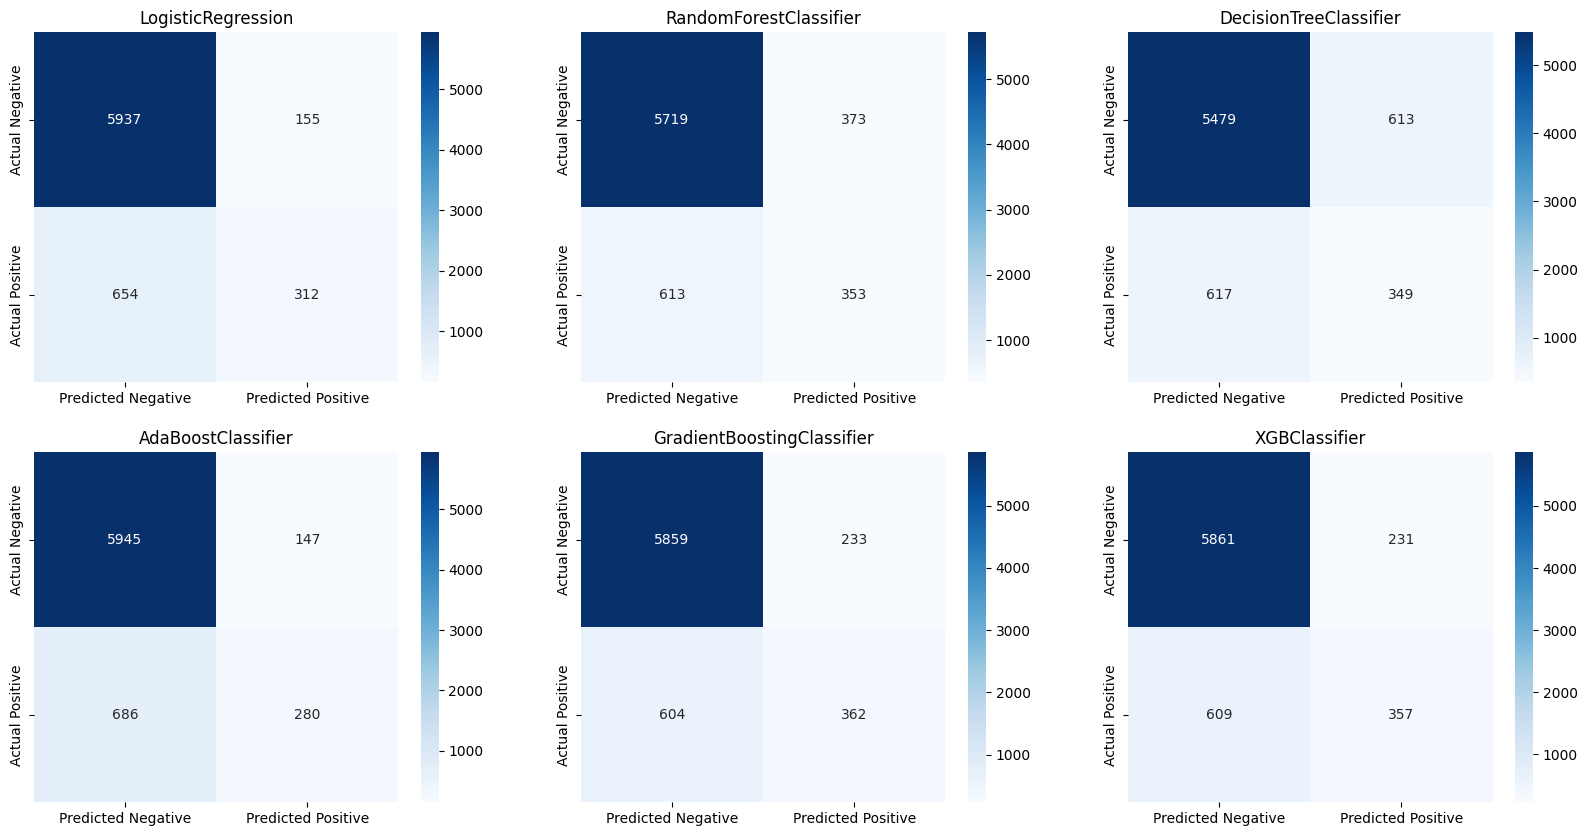

In [25]:
# call classification algorithm
classification_algorithms(x_train, x_valid, y_train, y_valid)

**Model Selection**
- Four models have an accuracy score above 88%. Namely Logistic Regression, AdaBoost Classifier, Gradient Boosting Classifier, and XGB Classifier in decreasing order
- Since there is an imbalance distribution in our target variable (bank_account status), we can't wholly rely on the accuracy score
- From our project objective, the f1 score is suitable for further confirmation. Gradient Boosting Classifier and XGB Classifier have the highest f1 score of 0.46 closely followed by Logistic Regression with 0.44
- Morever, Logistic Regression has the highest precision score

- **Logistic Regression is the selected model**

# Model Testing

In [26]:
# transform testing dataset using dict vectorizer
test_dict = df_test.to_dict(orient = 'records')
x_test = dv.transform(test_dict)
print(x_test.shape)

# append predictions to df_test
df_test['bank_account'] = LR_model.predict(x_test)
df_test.head()

(10086, 40)


,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0


In [27]:
# submission file
submit = pd.DataFrame({'unique_id': test_uniqueid + ' x ' + df_test.country,
                       'bank_account': df_test.bank_account})

submit.head(10)

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
5,uniqueid_6074 x Kenya,0
6,uniqueid_6075 x Kenya,0
7,uniqueid_6076 x Kenya,1
8,uniqueid_6077 x Kenya,0
9,uniqueid_6078 x Kenya,0


In [28]:
# save file
submit.to_csv('submission_file.csv', index=False)